<a href="https://colab.research.google.com/github/byte-kraken/MicroBit_TicTacToe/blob/master/PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Dec 14 20:51:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/235.7 GB disk)


In [4]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [5]:
!pip install roboflow

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
rf = Roboflow(api_key="Jx503iGAzcxgc0NUZaQX")
project = rf.workspace("mouli").project("project_pid-pg4gb")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project_PID-1 in yolov11:: 100%|██████████| 2146/2146 [00:00<00:00, 5390.97it/s]


In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Project_PID-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

**Checks**

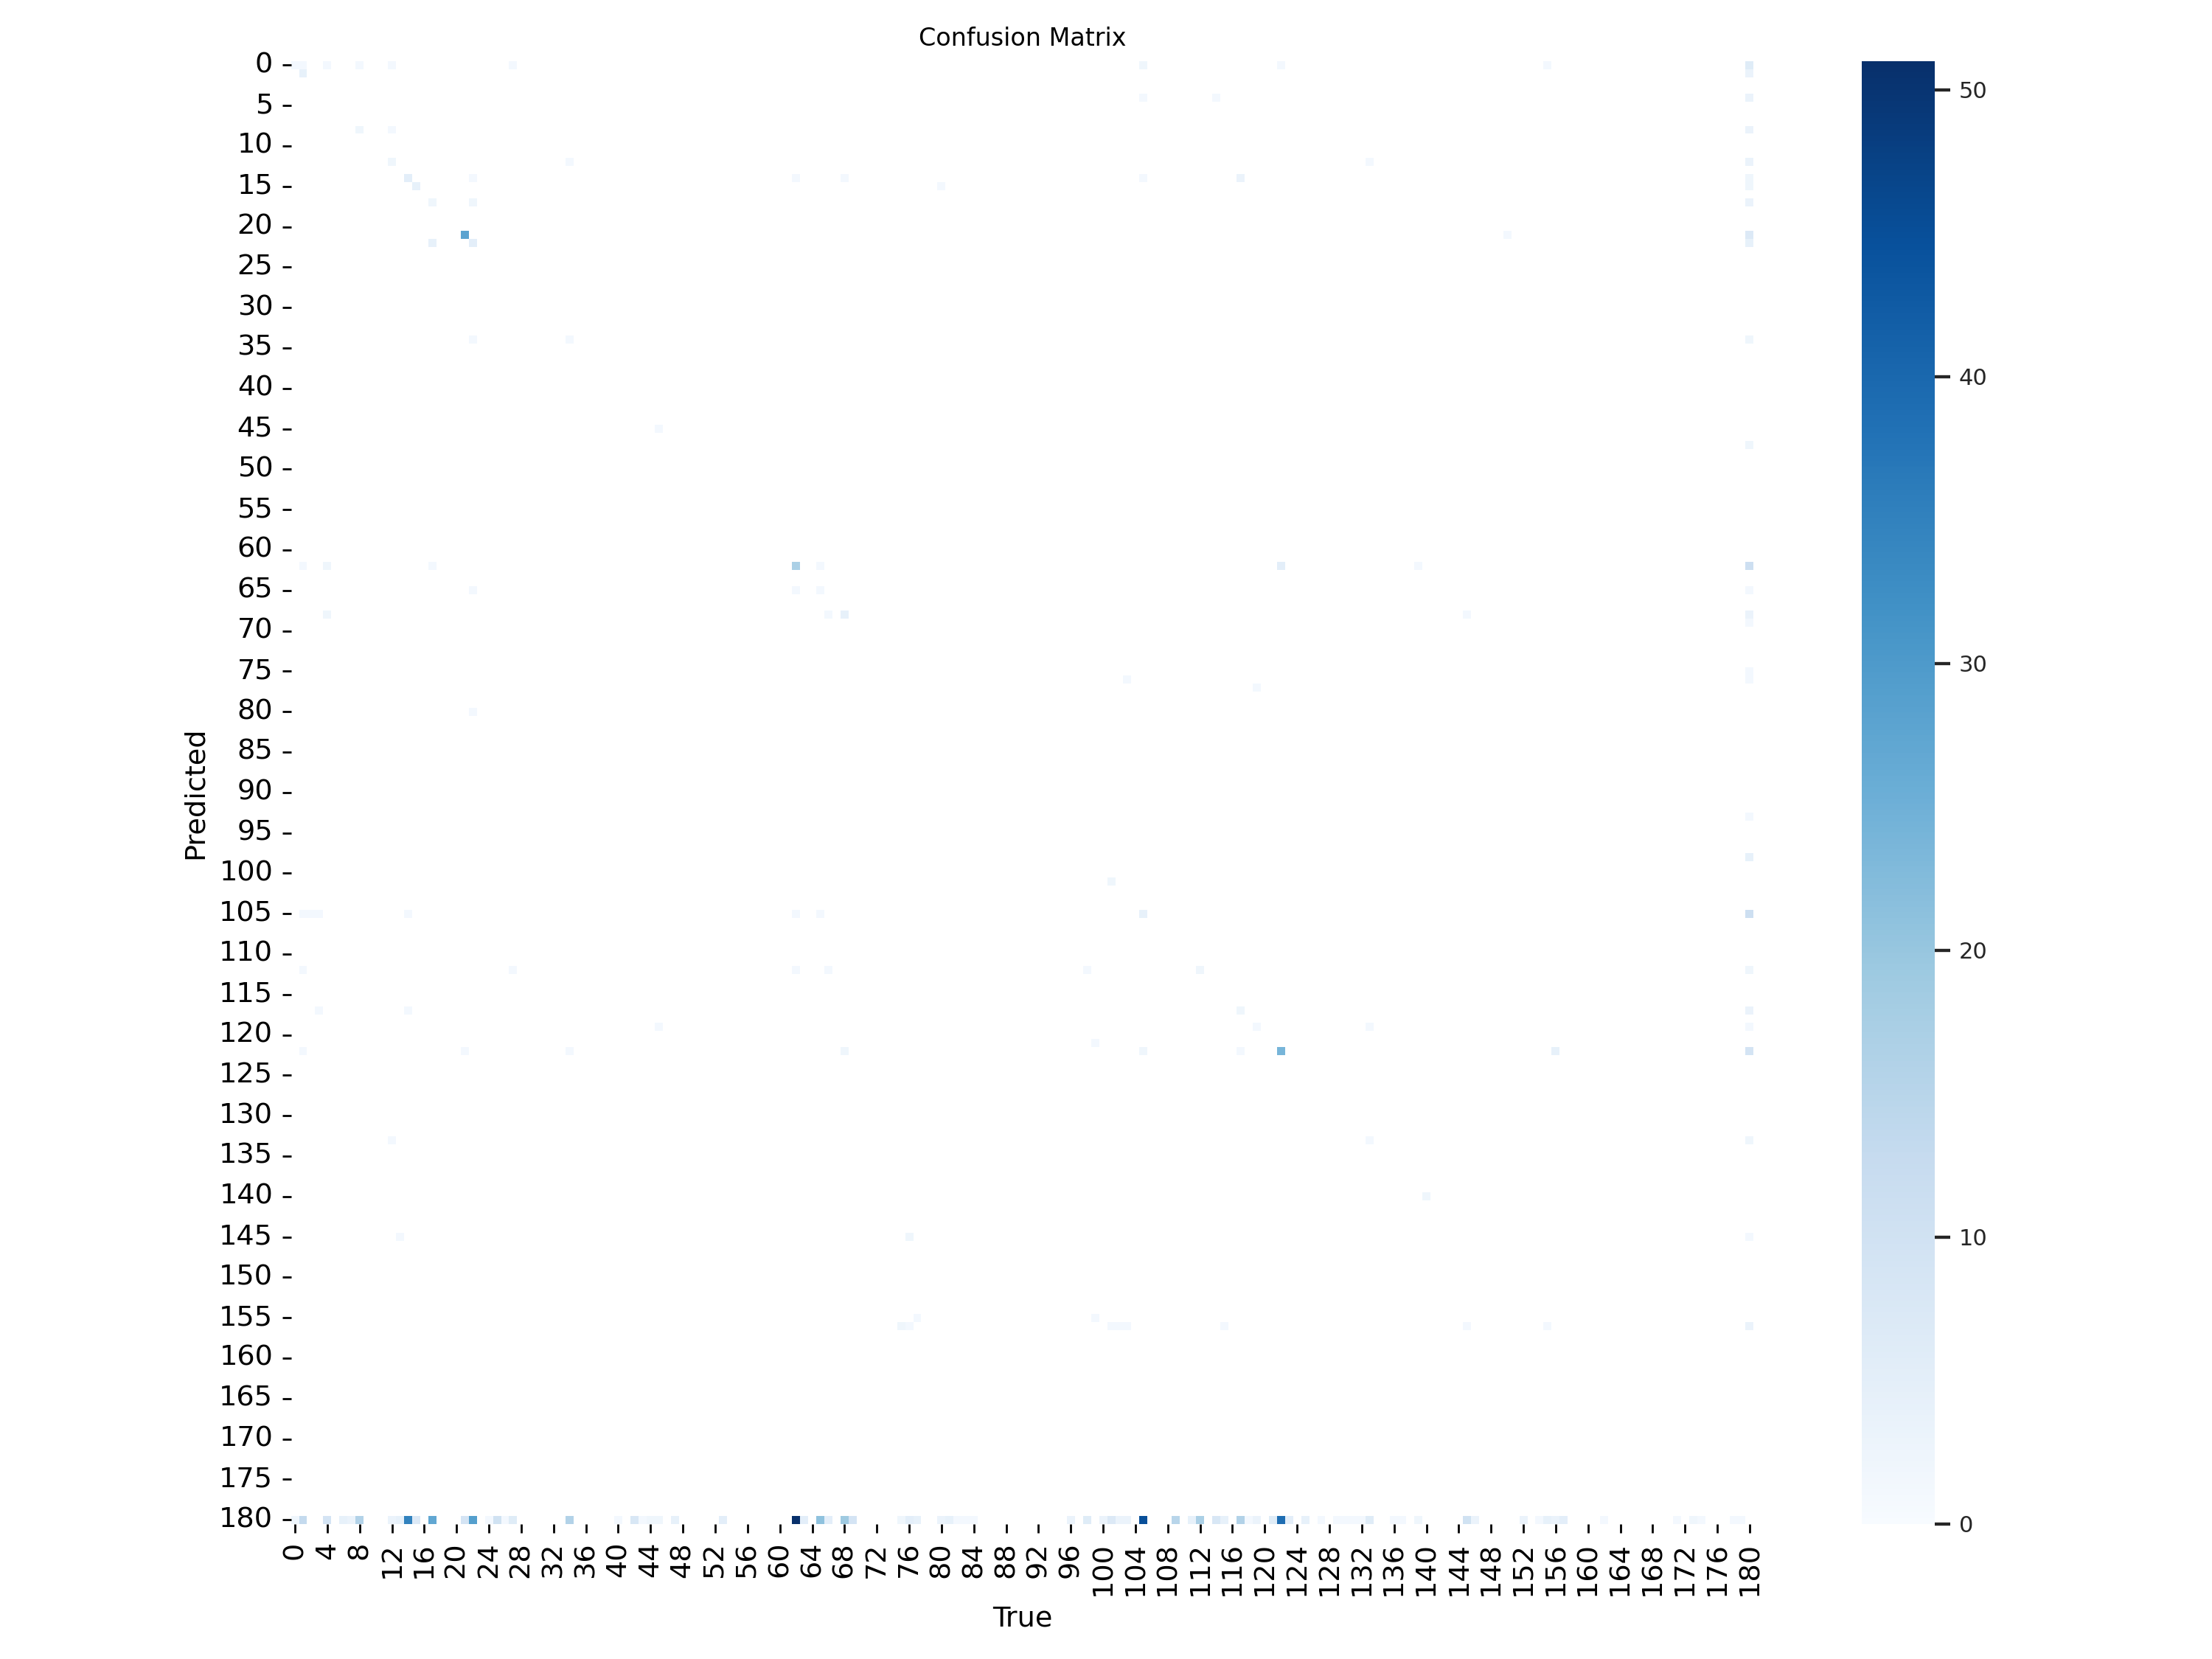

In [20]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

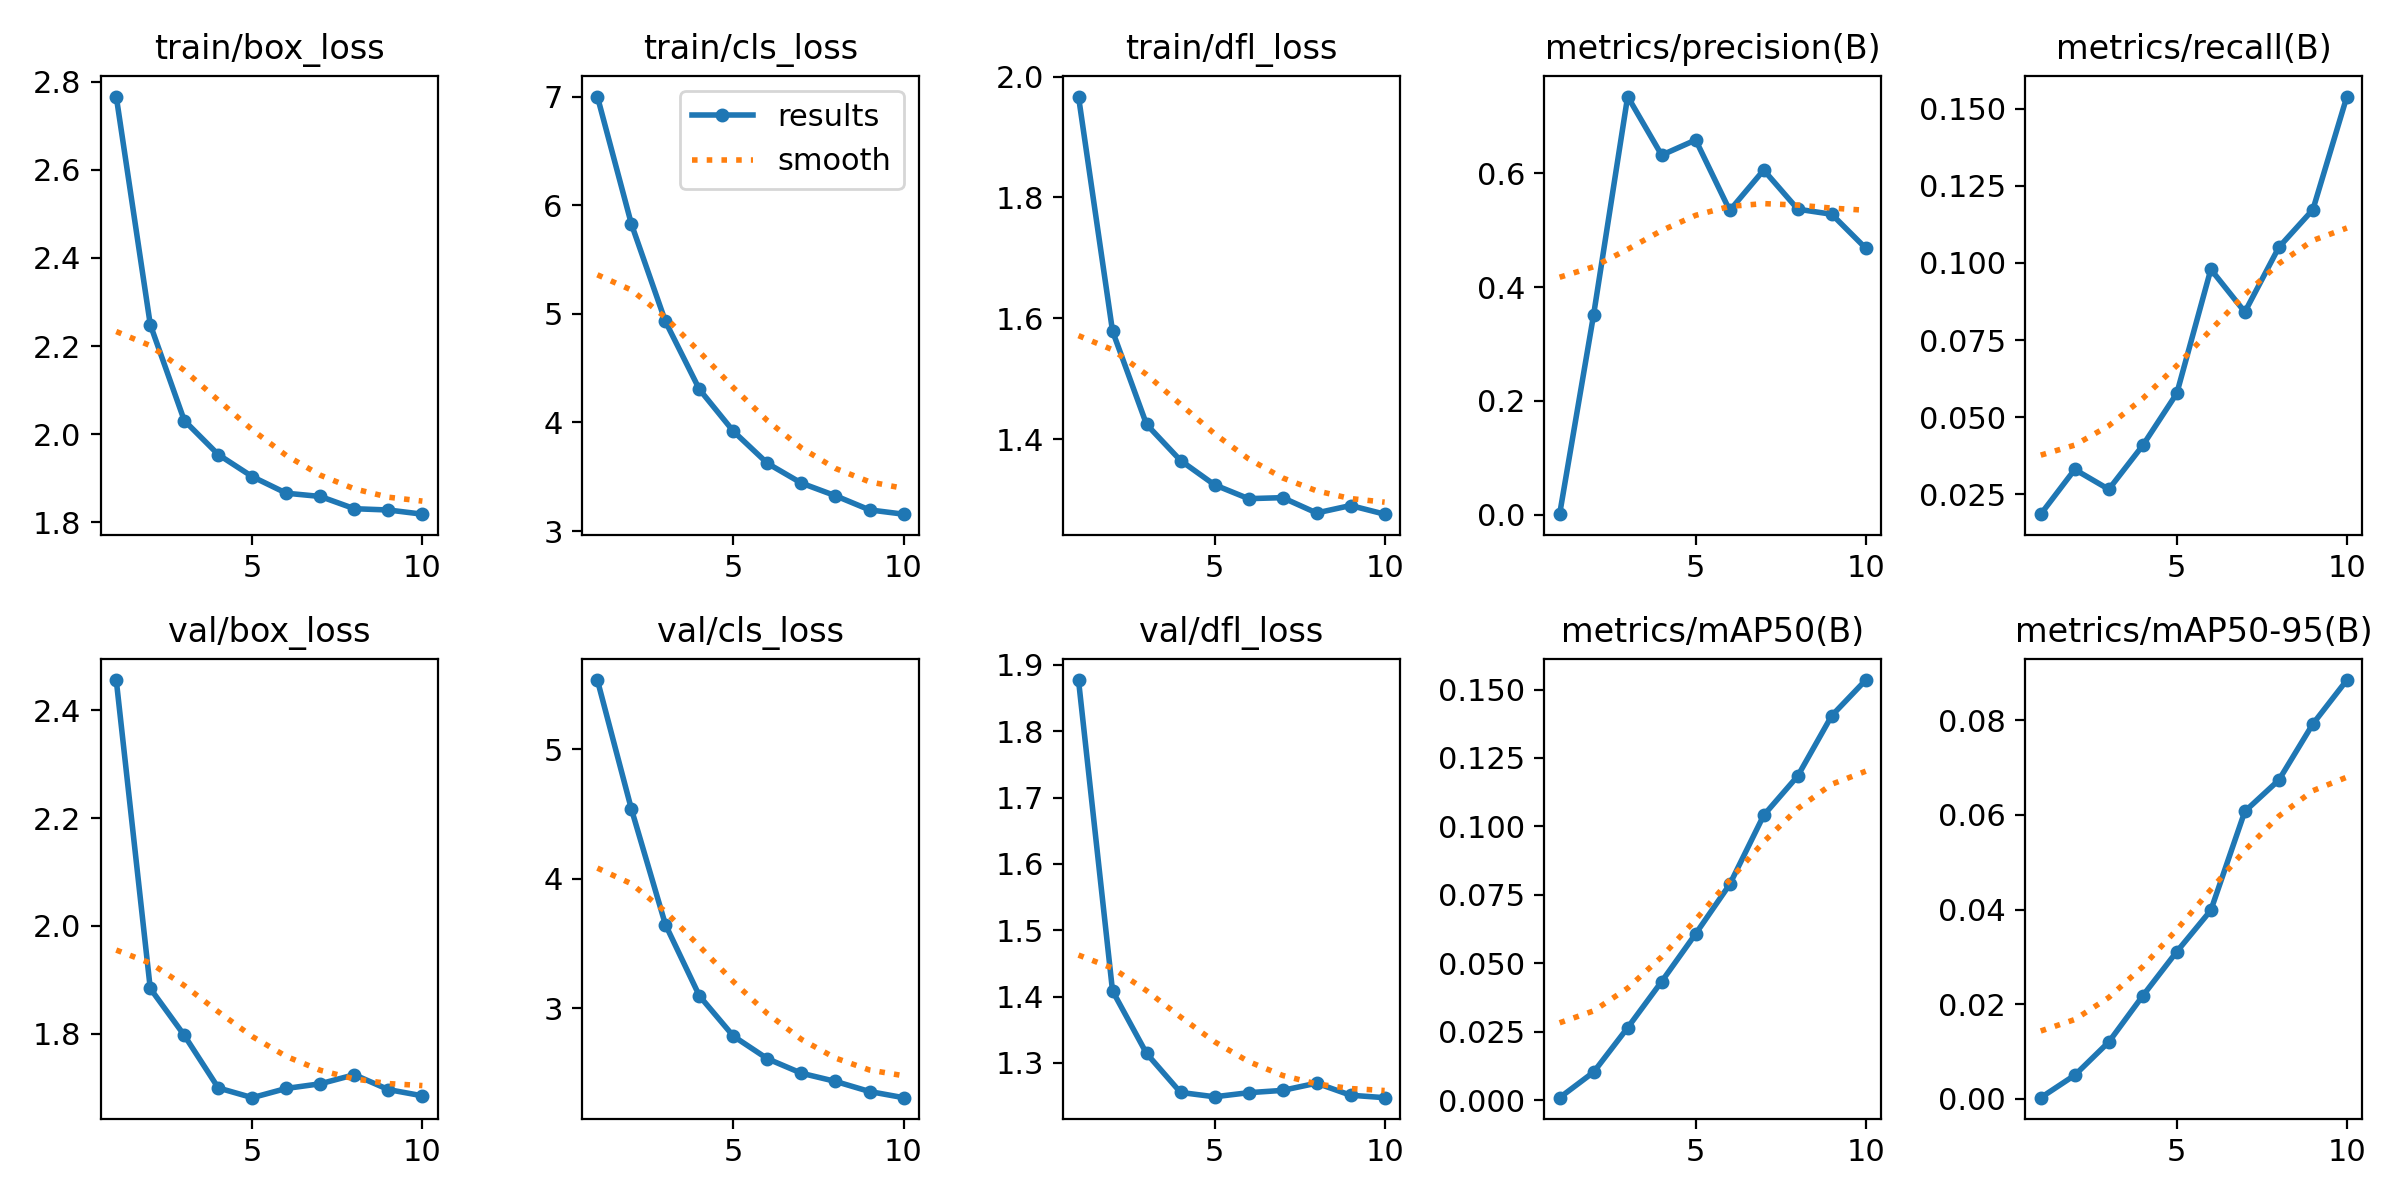

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

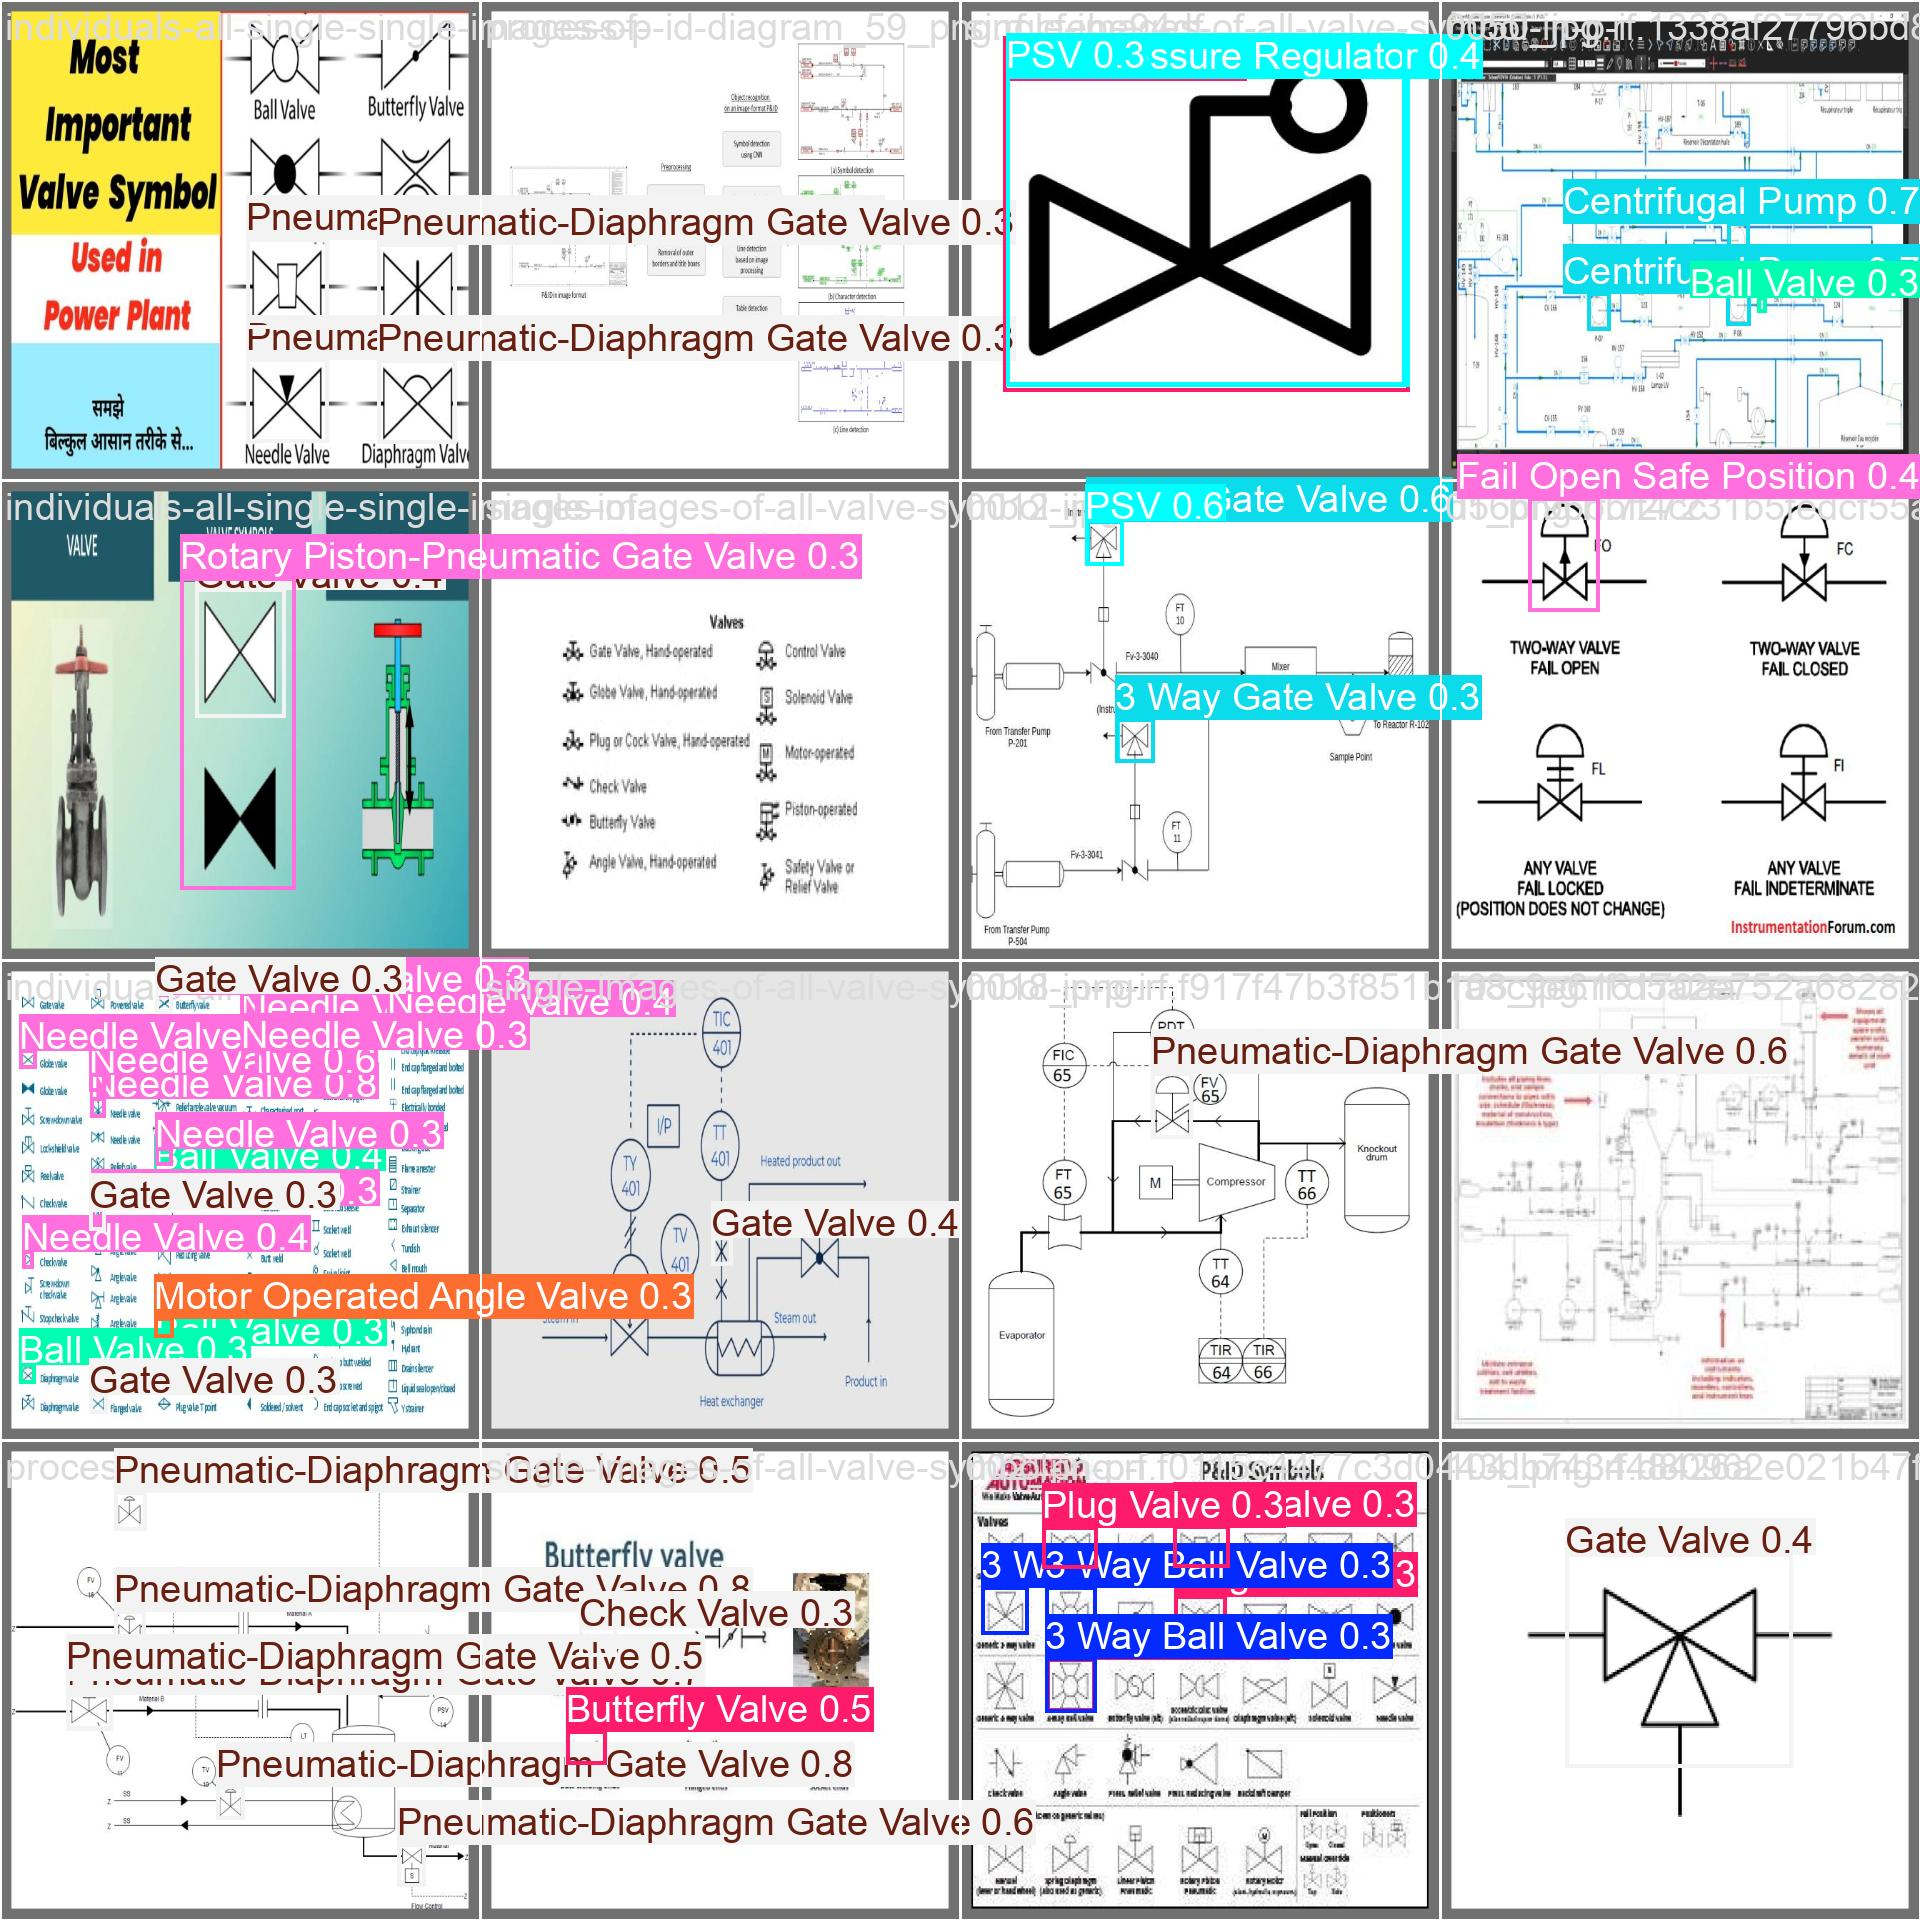

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [23]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,482,460 parameters, 0 gradients, 21.7 GFLOPs
val: Scanning /content/datasets/Project_PID-1/valid/labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100% 97/97 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.57it/s]
                   all         97        800      0.468      0.155      0.153     0.0883
      3 Way Ball Valve          3          3     0.0239      0.333     0.0354     0.0319
      3 Way Gate Valve         19         22      0.192      0.409      0.281       0.14
     3 Way Globe Valve          1          1          1          0          0          0
      4 Way Ball Valve          2          2          1          0      0.504      0.353
      4 Way Gate Valve          9         14      0.199      0.143      0.135      0.107
        Angle Blowdown          4          

In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,482,460 parameters, 0 gradients, 21.7 GFLOPs

image 1/97 /content/datasets/Project_PID-1/test/images/0012_png.rf.4ff5f210c6cbc9c8c6046ec0522e583d.jpg: 640x640 2 3 Way Gate Valves, 1 Check Valve, 2 PSVs, 16.0ms
image 2/97 /content/datasets/Project_PID-1/test/images/00175_png.rf.4ca1a7c6d4c5eee1f7d941532d6e5ffb.jpg: 640x640 1 Ball Valve, 3 Check Valves, 1 Gate Valve, 1 Hand Operated Gate Valve, 16.1ms
image 3/97 /content/datasets/Project_PID-1/test/images/0018_jpg.rf.29af15f4a9d89752767cf197f291c66a.jpg: 640x640 1 Pneumatic-Diaphragm Gate Valve, 16.0ms
image 4/97 /content/datasets/Project_PID-1/test/images/001_jpg.rf.454810a2a41d2fde264342a380cf3103.jpg: 640x640 1 BackPressure Regulator, 1 Ball Valve, 3 Bleeder Valves, 2 Butterfly Valves, 1 Check Valve, 1 Hand Operated Gate Valve, 1 Hydraulic Operated Ball Valve, 2 Integrated Block Valves, 1 Motor Operated Angle Valve,

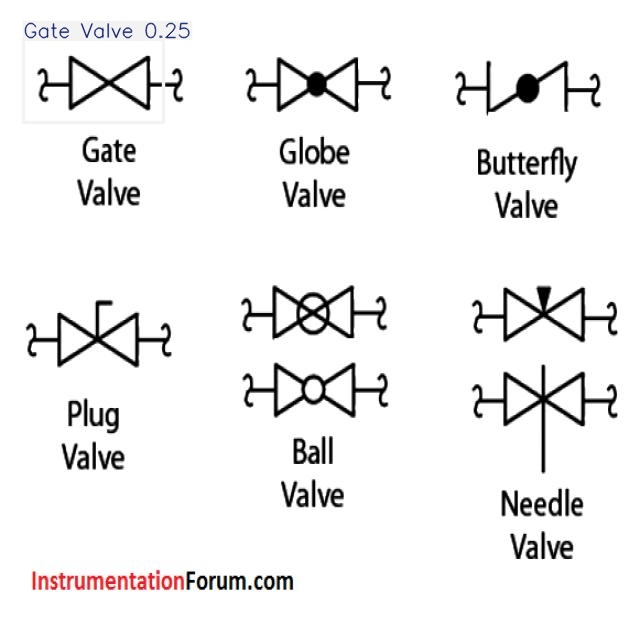

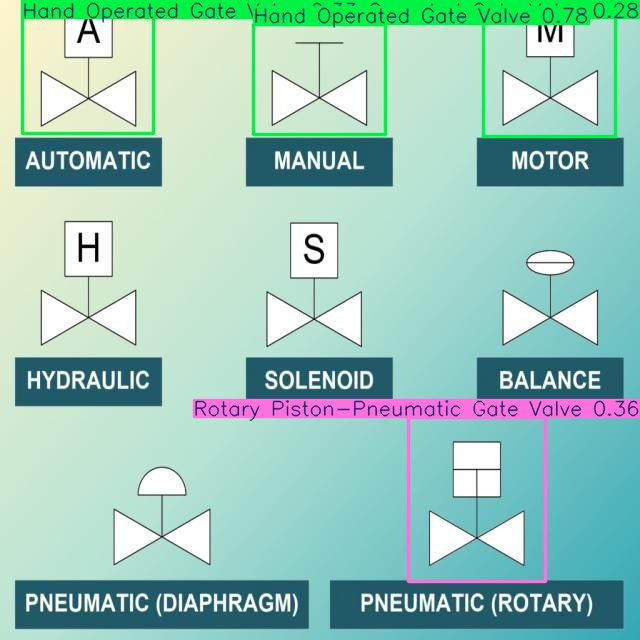

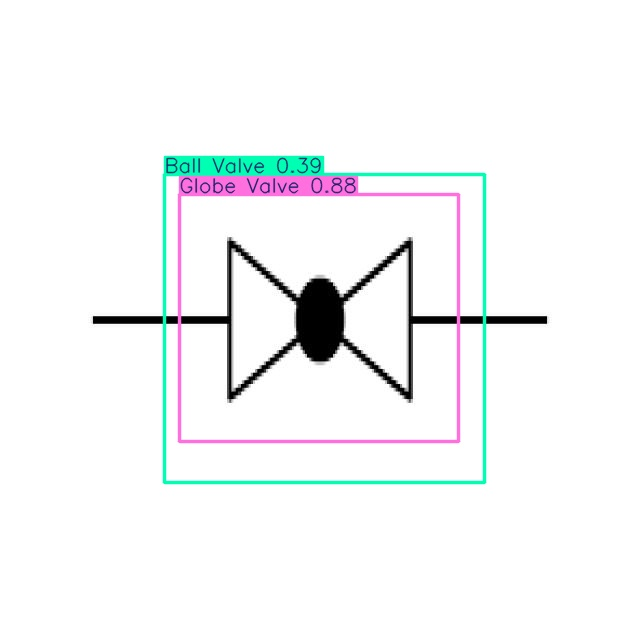

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")